#                               Credit card fraud Detection Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Importing the dataset
ccfraud = pd.read_csv(r"C:\Users\Boluwatife Deborah\Desktop\Data Analyst Portfolio\creditcard.csv.zip")
ccfraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#This gives us a summary of the first five rows in the dataset
ccfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#This gives us a summary of the last 5 rows in the dataset
ccfraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#Viewing data information
ccfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Checking for missing values
ccfraud.isnull().sum().sort_values()

Time      0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
Amount    0
V15       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
V14       0
Class     0
dtype: int64

In [7]:
ccfraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# To check the distribution of fraudulent transaction to non fraudulent transactions
ccfraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# Class 0 = Not fraudulent transaction and Class 1 = Fraudulent transaction
not_fraud = ccfraud.loc[ccfraud['Class'] == 0]
fraud = ccfraud.loc[ccfraud['Class'] == 1]

From the code above we can observe that the data is highly inbalanced due to the huge difference in the data points of the two categories and we therefore separate the data categories into two different variables for the purpose of this analysis.


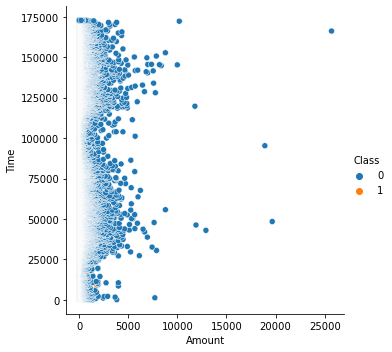

In [10]:
sns.relplot(x = 'Amount', y = 'Time', hue = 'Class', data = ccfraud)

From a distance the fraudulent points are not really obvious but if you look closely you'll notice some yellow dots in the range 0 - 25000 on the Time axis. This is because the number of fraudulent activities are actually small relative to the no fraudulent ones which makes it more obvious that our data is imbalanced.

<AxesSubplot:xlabel='Amount', ylabel='Time'>

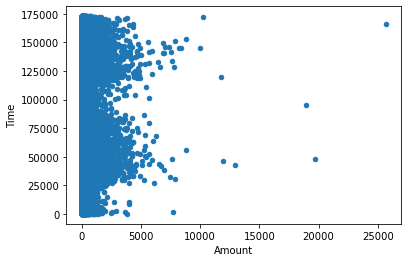

In [11]:
# therefore we plot each category in the variable to better visualize the data
ccfraud[ccfraud.Class == 0].plot.scatter('Amount','Time')

<AxesSubplot:xlabel='Amount', ylabel='Time'>

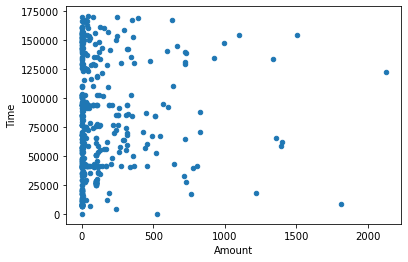

In [12]:
ccfraud[ccfraud.Class == 1].plot.scatter('Amount','Time')

In [13]:
# to get some features of the data 
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We can see that the average transacted amount of a normal transaction is about $88.29. In the next line of code we would do the same for the fraudulent transactions.

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# To compare the values of transactions
ccfraud.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


This helps us see the wider difference accross all components for both a fraudulent and non-fraudulent transaction.

To fix the problem of imbalanced data we will use the method of UNDERSAMPLING. Here we build a sample dataset containing similar distribution of the non-fraudulent and fraudulent transactions.Recall that the count of fraudulent transactions is 492 and that of non-fraudulent transactions is 284315.

In [16]:
nf_sample = not_fraud.sample(n = 492)

In [17]:
nf_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
268183,163098.0,-4.237557,4.405630,-3.519578,-0.984004,-1.155992,-1.110501,-0.966956,2.196317,1.000590,...,0.238394,1.067774,0.272424,0.501636,0.005454,-0.206314,0.747851,0.406840,1.49,0
148200,89554.0,2.007350,-0.201276,-2.975007,-0.564539,2.592582,3.148763,-0.394311,0.779978,0.357899,...,-0.342027,-1.005914,0.348492,0.605699,-0.270805,0.217856,-0.042423,-0.039825,18.99,0
141972,84540.0,-0.598326,0.378813,1.060383,-1.236337,-0.023895,-0.829466,0.202016,-0.243425,-1.390871,...,-0.099012,-0.304978,0.132311,-0.195784,-0.082252,-0.505687,-0.128516,0.046208,10.00,0
83709,59991.0,0.881568,-0.191056,0.137721,1.133722,-0.346471,-0.574300,0.357145,-0.147325,-0.344985,...,0.183176,0.177539,-0.261637,0.359068,0.607796,-0.364478,-0.019305,0.039716,170.13,0
70419,53860.0,1.316889,0.675204,-1.034938,0.823184,1.042372,0.085189,0.215845,-0.024187,-0.329502,...,-0.122281,-0.275207,-0.357403,-1.514938,0.913437,-0.239821,0.033366,0.031175,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73053,54954.0,0.552121,-1.560915,0.472046,-1.385940,-0.694659,1.535613,-0.740288,0.597775,1.573587,...,0.443158,1.105190,-0.218800,-0.919608,0.061518,0.197341,0.067895,0.043423,257.40,0
45468,42361.0,1.189107,-1.822538,1.270156,-0.952044,-2.218088,0.589625,-1.802240,0.385660,-0.802411,...,-0.044250,0.430727,-0.085523,0.238377,0.315215,0.006616,0.082158,0.025741,87.59,0
274887,166262.0,-0.033772,0.860695,-2.347618,-1.198901,2.805034,3.143196,0.075524,1.218619,-0.404866,...,0.356080,0.868589,-0.039699,0.631193,-0.297234,-0.132892,0.008171,0.033744,31.00,0
271524,164613.0,-0.587592,0.887164,-1.095781,-0.752289,1.349109,-0.056748,0.518081,0.342125,-0.446401,...,0.391331,1.301578,0.106863,-0.290897,-0.534344,-0.207698,0.290776,0.210436,1.79,0


We then concatenate i.e. join the two dataframes (that of the sample data and that of the fraudulent transactions to populate the data points of the transactions data which therefore helps increase the performance of our machine learning algorithm.

In [18]:
new_data = pd.concat([nf_sample, fraud], axis = 0)

In [19]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
268183,163098.0,-4.237557,4.405630,-3.519578,-0.984004,-1.155992,-1.110501,-0.966956,2.196317,1.000590,...,0.238394,1.067774,0.272424,0.501636,0.005454,-0.206314,0.747851,0.406840,1.49,0
148200,89554.0,2.007350,-0.201276,-2.975007,-0.564539,2.592582,3.148763,-0.394311,0.779978,0.357899,...,-0.342027,-1.005914,0.348492,0.605699,-0.270805,0.217856,-0.042423,-0.039825,18.99,0
141972,84540.0,-0.598326,0.378813,1.060383,-1.236337,-0.023895,-0.829466,0.202016,-0.243425,-1.390871,...,-0.099012,-0.304978,0.132311,-0.195784,-0.082252,-0.505687,-0.128516,0.046208,10.00,0
83709,59991.0,0.881568,-0.191056,0.137721,1.133722,-0.346471,-0.574300,0.357145,-0.147325,-0.344985,...,0.183176,0.177539,-0.261637,0.359068,0.607796,-0.364478,-0.019305,0.039716,170.13,0
70419,53860.0,1.316889,0.675204,-1.034938,0.823184,1.042372,0.085189,0.215845,-0.024187,-0.329502,...,-0.122281,-0.275207,-0.357403,-1.514938,0.913437,-0.239821,0.033366,0.031175,1.00,0


In [20]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now we have a uniformly distributed data

In [22]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95795.699187,0.009698,-0.123442,0.024788,-0.071654,0.001145,0.013940,-0.097643,-0.045971,0.027871,...,0.026111,0.003462,0.066299,0.004320,0.006165,-0.026561,-0.001875,0.011644,0.001013,93.320407
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


With this we can observe that the difference in the data is still there and us creating a new data with a uniformed distribution does not affect our data in any way, it just makes sure our machine learning prediction is better. The line of code tells us if we got a good sample or a bad sample, if we got a bad sample, the mean values would have a very big difference from that of the original data.


### BUILDING THE MACHINE LEARNING ALGORITHM

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [24]:
# Splitting the dataset to train and test data
X = new_data.iloc[:,:-1]
Y = new_data['Class']

Where Y represents the target variable and X represents the predictor variable.

In [25]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
268183,163098.0,-4.237557,4.405630,-3.519578,-0.984004,-1.155992,-1.110501,-0.966956,2.196317,1.000590,...,0.949624,0.238394,1.067774,0.272424,0.501636,0.005454,-0.206314,0.747851,0.406840,1.49
148200,89554.0,2.007350,-0.201276,-2.975007,-0.564539,2.592582,3.148763,-0.394311,0.779978,0.357899,...,-0.086074,-0.342027,-1.005914,0.348492,0.605699,-0.270805,0.217856,-0.042423,-0.039825,18.99
141972,84540.0,-0.598326,0.378813,1.060383,-1.236337,-0.023895,-0.829466,0.202016,-0.243425,-1.390871,...,0.103288,-0.099012,-0.304978,0.132311,-0.195784,-0.082252,-0.505687,-0.128516,0.046208,10.00
83709,59991.0,0.881568,-0.191056,0.137721,1.133722,-0.346471,-0.574300,0.357145,-0.147325,-0.344985,...,0.225304,0.183176,0.177539,-0.261637,0.359068,0.607796,-0.364478,-0.019305,0.039716,170.13
70419,53860.0,1.316889,0.675204,-1.034938,0.823184,1.042372,0.085189,0.215845,-0.024187,-0.329502,...,0.010253,-0.122281,-0.275207,-0.357403,-1.514938,0.913437,-0.239821,0.033366,0.031175,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [26]:
Y

268183    0
148200    0
141972    0
83709     0
70419     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [27]:
# Splitting the data into train and test
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y, random_state = 410)

Stratify helps distribute the values of Y evenly between the train and test data.

In [28]:
print(X.shape, X_train.shape, x_test.shape)

(984, 30) (688, 30) (296, 30)


Here we can see the distribution of values in our train and test data for the predictor variable there X_train has 70% of the data and x_test has 30% of the data.

In [29]:
# To check the distribution of the target variable
print(Y.shape, Y_train.shape, y_test.shape)

(984,) (688,) (296,)


### Training the Model using Logistic Regression

In [30]:
#Creating an instance of a Logistic regression named lr
lr = linear_model.LogisticRegression()

In [31]:
lr.fit(X_train, Y_train)

LogisticRegression()

### To see the performance of the fitted model

To do this we will use the models accuracy score which is a metric for evaluating model accuracy for logistic regression.

In [32]:
# using the training data
from sklearn.metrics import accuracy_score

X_train_pred = lr.predict(X_train)
td_accuracy = accuracy_score(X_train_pred, Y_train)

In [33]:
print('Training data accuracy = ', td_accuracy)

Training data accuracy =  0.9462209302325582


In [34]:
x_test_pred = lr.predict(x_test)
tx_accuracy = accuracy_score(x_test_pred, y_test)

In [35]:
print('Testing data accuracy = ', tx_accuracy)

Testing data accuracy =  0.9324324324324325


Since the accuracy score of training data is about 94.04%, and that of testing data is about 93.91% which is close to 94% we can say our model is good enough to predict if a transaction is fraudulent or not. If there was a big difference between the accuracy score for the training and testing data, then our model would have overfitted or underfitted depending on the difference between them. 

For instance, if the accuracy score of the testing data is way lesser than that of the training data e.g training data accuracy = 98% and testing data accuracy = 54%, then we have an overfitted model and if the training data accuracy is less than the testing data accuracy then our model is underfitted.